In [2]:
import shap
import pandas as pd
import numpy as np
import xgboost as XGBoost
from sklearn.model_selection import train_test_split


In [3]:
data = pd.DataFrame({
    'depth':np.random.uniform(1,100,100),
    'magnitude':np.random.uniform(4.0,7.0,100),
    'soil_type':np.random.choice([0,1],100),
    'latitude':np.random.uniform(-90,90,100),
    'longitude':np.random.uniform(-180,180,100),
    'risk':np.random.choice([0,1],100)
})

X =data.drop('risk',axis=1)
y =data['risk']

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
model =XGBoost.XGBClassifier(random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [7]:
explainer =shap.TreeExplainer(model)
shap_values =explainer.shap_values(X_test)

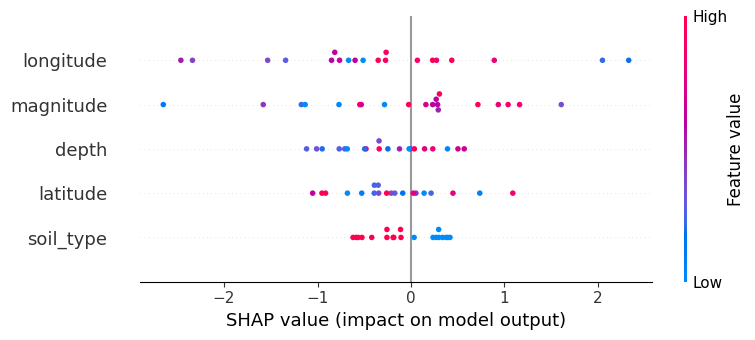

In [8]:
shap.summary_plot(shap_values, X_test)

Task: Load the RandomforestRegressor trained model, plot the SHAP values of the trained model using the preprocessed dataset.:

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
model1 =RandomForestRegressor(random_state=42)
model1.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
explainer1 =shap.TreeExplainer(model1)
shap_values =explainer1.shap_values(X_test)

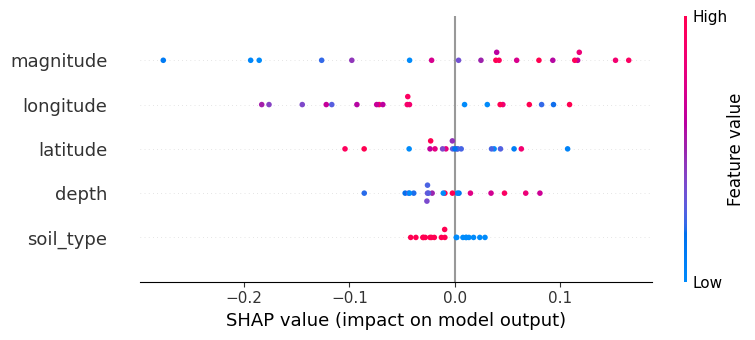

In [12]:
shap.summary_plot(shap_values, X_test)